In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
x_train=pd.read_csv("train.csv")
x_test=pd.read_csv("test.csv")
ID=x_test.PassengerId
y_test=pd.read_csv("gender_submission.csv")
y_test=y_test.iloc[:,1].values
#x_train.count()
#x_train["Age"].value_counts()

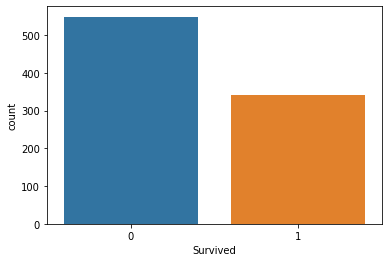

In [3]:
sns.countplot(x_train['Survived'],data=x_train)

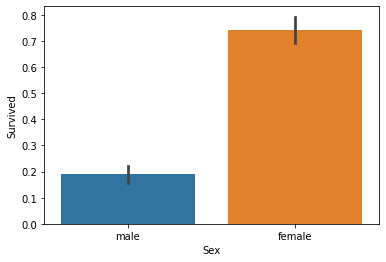

In [4]:
sns.barplot(x='Sex',y='Survived',data=x_train)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


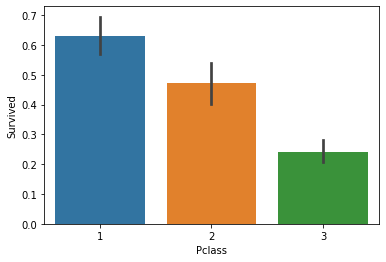

In [5]:
sns.barplot(x="Pclass", y="Survived", data=x_train)
print("Percentage of Pclass = 1 who survived:", x_train["Survived"][x_train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", x_train["Survived"][x_train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", x_train["Survived"][x_train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

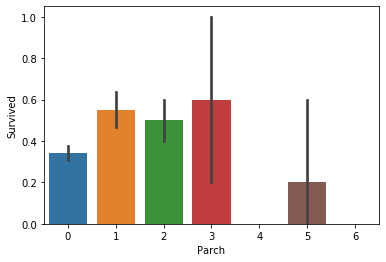

In [6]:
sns.barplot(x="Parch", y="Survived", data=x_train)
plt.show()

In [7]:
y_train=x_train.Survived

In [8]:
x_train=x_train.drop(columns='Survived')
x_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
dataset=pd.concat([x_train,x_test],sort=False, ignore_index=True)

In [10]:
#dataset.isnull().sum()
#dataset.isnull().mean()

In [11]:
#dataset.isnull().mean().sort_values(ascending=False)
dataset.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
mean=dataset["Age"].mean()
dataset["Age"]=dataset["Age"].fillna(mean)
mean=dataset["Fare"].mean()
dataset["Fare"]=dataset["Fare"].fillna(mean)
dataset["Embarked"]=dataset["Embarked"].fillna("S")

In [13]:
dataset=dataset.drop(columns=['Cabin','PassengerId','Name','Ticket'])

In [14]:
dataset = pd.get_dummies(dataset, columns = ["Sex", "Embarked"])

In [15]:
x_train=dataset[:len(x_train)]
x_test=dataset[len(x_train):]

In [16]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

C:\Users\meet1\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred_lr=lr.predict(x_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
y_pred_KNN=KNN.predict(x_test)

In [21]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',random_state=0)
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [22]:
y_pred_svm=svm.predict(x_test)

In [23]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
y_pred_NB=NB.predict(x_test)

In [25]:
from sklearn.ensemble import RandomForestClassifier
Rfc=RandomForestClassifier(n_estimators=5,criterion='entropy',random_state=0)
Rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
y_pred_Rfc=Rfc.predict(x_test)

In [30]:
output = pd.DataFrame({'PassengerId': ID, 'Survived':y_pred_NB})
output.to_csv('submission.csv', index=False)

'C:\\Users\\meet1\\AppData\\Roaming\\SPB_Data\\Titanic'